# The Hammond Postulate and Rope

I wanted an image for the Hammond postulate. We can demonstrate this idea with a strip of paper. Curve it upwards and change the hight of one end. the top of the arc will move closer to the higher end. This represents the reaction coordinate and the imaginary vibration that takes us through the transition state. A rope hanging between two points approximates the "valley" in a transection of a reaction energy surface that represent vibrations. These shapes are not a parabol or a hyperbola. It is a shapem called a *catenary*.

A hanging rope or chain is a catenary and the flipped version of that is the catenary arch, which is actually the mathematically strongest shape for an arch. If you have seen Gaudi's unfinished cathedral in Barcelona then you have seen these catenary arches in action.

"Structural Design in the Work of Gaudi", Santiago Huerta, *Architectural Science Review*, **2006**, Volume *49*, 324-339. https://doi.org/10.3763/asre.2006.4943  https://oa.upm.es/703/1/Huerta_Art_002.pdf

The code below was stolen from Stack Exchange at https://codegolf.stackexchange.com/questions/37609/catenary-between-two-points-hanging-chain. All code as been written already. We just need to reuse it and repurpose it.

In [45]:
y = sum[1][1:]
bottom = y.min()
ind = np.where(y == bottom)
#print(y)
print(y.min())
print(ind)
i = ind[0][0]
x = sum[0][i]
print(x)


3.5866385950899176
(array([763]),)
3.2322118409671843


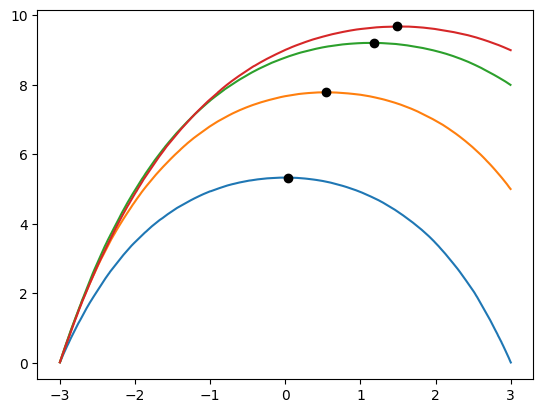

In [78]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

def rotate(angle, x, y):
   return x * math.cos(angle) + y * math.sin(angle), -x * math.sin(angle) + y  * math.cos(angle)

def eval(chain, x1, y1):
   mysum = chain.cumsum(1)
   springpotential = 1000 * ((mysum[0][-1] - x1) ** 2 + (mysum[1][-1] - y1)  ** 2)
   potential = mysum.cumsum(1)[1][-1]
   return springpotential + potential

def jiggle(chain, x1, y1):
   for _ in range(100000):
      pre = eval(chain, x1, y1)
      angle = random.random() * 2 * math.pi
      index = random.randint(1,1000)
      chain[0][index], chain[1][index] = rotate(angle, chain[0][index], chain[1][index])
      if( pre < eval(chain, x1, y1)):
         chain[0][index], chain[1][index] = rotate(-angle, chain[0][index], chain[1][index])

def makeCatenary (length, x0, y0, x1, y1):
    chain = np.array([[x0] + [length / 1000.]*1000, [y0] + [0.] * 1000])
    jiggle(chain, x1, y1)
    sum = chain.cumsum(1)
    x1 = 2 * x1 - sum[0][-1]
    y1 = 2 * y1 - sum[1][-1]
    jiggle(chain, x1, y1)
    sum = chain.cumsum(1)
    x = sum[0][1:]
    y = sum[1][1:]
    ybottom = y.min()
    ind = np.where(y == ybottom)
    i = ind[0][0]
    xbottom = x[i]
    curve = [x,y]
    bottom = [xbottom, ybottom]
    return(curve, bottom)
    
curve, bottom = makeCatenary (13, -3, 10, 3, 10)
plt.plot(curve[0], 10-curve[1])
plt.plot(bottom[0], 10-bottom[1], "ko")
#plt.axvline(x = xbottom, color = 'b')

curve, bottom = makeCatenary (13, -3, 10, 3, 5)
plt.plot(curve[0], 10-curve[1])
plt.plot(bottom[0], 10-bottom[1], "ko")

curve, bottom = makeCatenary (13, -3, 10, 3, 2)
plt.plot(curve[0], 10-curve[1])
plt.plot(bottom[0], 10-bottom[1], "ko")

curve, bottom = makeCatenary (13, -3, 10, 3, 1)
plt.plot(curve[0], 10-curve[1])
plt.plot(bottom[0], 10-bottom[1], "ko")

plt.show()


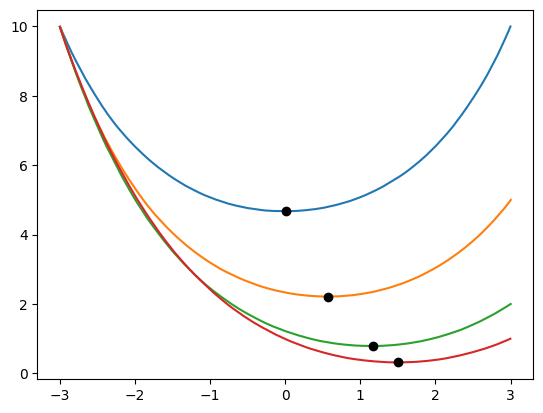

In [79]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

def rotate(angle, x, y):
   return x * math.cos(angle) + y * math.sin(angle), -x * math.sin(angle) + y  * math.cos(angle)

def eval(chain, x1, y1):
   mysum = chain.cumsum(1)
   springpotential = 1000 * ((mysum[0][-1] - x1) ** 2 + (mysum[1][-1] - y1)  ** 2)
   potential = mysum.cumsum(1)[1][-1]
   return springpotential + potential

def jiggle(chain, x1, y1):
   for _ in range(100000):
      pre = eval(chain, x1, y1)
      angle = random.random() * 2 * math.pi
      index = random.randint(1,1000)
      chain[0][index], chain[1][index] = rotate(angle, chain[0][index], chain[1][index])
      if( pre < eval(chain, x1, y1)):
         chain[0][index], chain[1][index] = rotate(-angle, chain[0][index], chain[1][index])

def makeCatenary (length, x0, y0, x1, y1):
    chain = np.array([[x0] + [length / 1000.]*1000, [y0] + [0.] * 1000])
    jiggle(chain, x1, y1)
    sum = chain.cumsum(1)
    x1 = 2 * x1 - sum[0][-1]
    y1 = 2 * y1 - sum[1][-1]
    jiggle(chain, x1, y1)
    sum = chain.cumsum(1)
    x = sum[0][1:]
    y = sum[1][1:]
    ybottom = y.min()
    ind = np.where(y == ybottom)
    i = ind[0][0]
    xbottom = x[i]
    curve = [x,y]
    bottom = [xbottom, ybottom]
    return(curve, bottom)
    
curve, bottom = makeCatenary (13, -3, 10, 3, 10)
plt.plot(curve[0], curve[1])
plt.plot(bottom[0], bottom[1], "ko")
#plt.axvline(x = xbottom, color = 'b')

curve, bottom = makeCatenary (13, -3, 10, 3, 5)
plt.plot(curve[0], curve[1])
plt.plot(bottom[0], bottom[1], "ko")

curve, bottom = makeCatenary (13, -3, 10, 3, 2)
plt.plot(curve[0], curve[1])
plt.plot(bottom[0], bottom[1], "ko")

curve, bottom = makeCatenary (13, -3, 10, 3, 1)
plt.plot(curve[0], curve[1])
plt.plot(bottom[0], bottom[1], "ko")

plt.show()
